Please input the total width of graphene sheet Å = 10
Please input the total length of graphene sheet in Å = 10


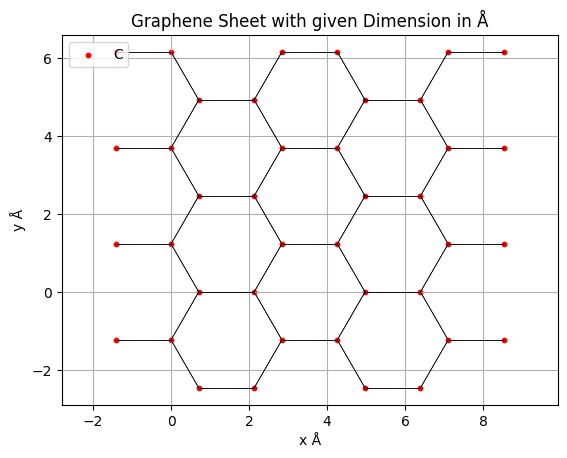

In [3]:
import math
import matplotlib.pyplot as plt

# Define the carbon-carbon bond length
bond_length = 1.42 # distance between C-C atmoms in graphene in Å

# Take input from the user for required length and width of graphene sheet
width = float(input('Please input the total width of graphene sheet Å = ')) # Provide width in Angostrom
length = float(input('Please input the total length of graphene sheet in Å = ')) # Provide length in Angstrom unit

# To calculate the number of carbon atoms along X and Y direction in sheet
num_atoms_x = math.ceil(length / (3 * bond_length) * 4)
num_atoms_y = math.ceil((width - bond_length * math.sqrt(3) / 2) / (bond_length * math.sqrt(3)))

# To generate the cordinate orientation of the carbon atoms in the graphene sheet in X and Y axis
x_coords = [0] * (num_atoms_x*num_atoms_y)
y_coords = [0] * (num_atoms_x*num_atoms_y)

x_coords_row = [0] * num_atoms_x
y_coords_row = [0] * num_atoms_x

for i in range(num_atoms_x):
    if i % 2 == 0:
        x_coords_row[i] = (3*i-4)/4 * bond_length
    else:
        x_coords_row[i] = 3*(i-1)/4 * bond_length

    if i % 4 == 2 or i % 4 == 3:
        y_coords_row[i] = 0
    else:
        y_coords_row[i] = math.sqrt(3)/2 * bond_length

for i in range(num_atoms_y):
    for j in range(num_atoms_x):
        x_coords[i*num_atoms_x + j] = x_coords_row[j]
        y_coords[i*num_atoms_x + j] = y_coords_row[j] + (i-1) * math.sqrt(3) * bond_length

# Create a 2D scatter plot of the carbon atom positions
plt.scatter(x_coords, y_coords, s=10, facecolors='red', edgecolors='red')
plt.axis('equal')
plt.grid(True)
plt.xlabel('x Å')
plt.ylabel('y Å')
plt.title('Graphene Sheet with given Dimension in Å')
plt.legend('C atoms',loc='upper left')

# Compute the distance between two points, and draw a line connecting the atoms if distance is less than 0.0001
def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

for i in range(num_atoms_y):
    for j in range(num_atoms_x):
        for k in range(num_atoms_y):
            for l in range(num_atoms_x):
                if i != k or j != l:
                    dist = distance(x_coords[i*num_atoms_x + j], y_coords[i*num_atoms_x + j], x_coords[k*num_atoms_x + l], y_coords[k*num_atoms_x + l])
                    if abs(dist - bond_length) < 0.0001:
                        plt.plot([x_coords[i*num_atoms_x + j], x_coords[k*num_atoms_x + l]], [y_coords[i*num_atoms_x + j], y_coords[k*num_atoms_x + l]], 'k-', linewidth=0.5)

# Write the coordinates to a .xyz file
with open('graphene_sheet.xyz', 'w') as fileID:
    fileID.write(str(num_atoms_x*num_atoms_y) + '\n')
    fileID.write('graphene_sheet\n')
